In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# carregar os dados
kabum = pd.read_json('kabum.json').transpose();

# remover colunas irrelevantes
del kabum['imagem']
del kabum['data_acab']
del kabum['data_fim']
del kabum['data_ini']
del kabum['dep']

In [3]:
kabum.describe()

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta
count,869,869,869,869,869,869,869,869.0000
unique,869,11,56,108,869,146,461,265.0000
top,89032,Periféricos,17,0,"Smartphone Samsung Galaxy J7 Pro SM-J730, Octa...",0,699.90,99.9005
freq,1,307,47,594,1,260,17,30.0000


In [4]:
kabum.head(10)

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta
1,88949,Eletroportáteis,23,0,Aspirador de Pó Philco PH Rapid 1000 N 127V,250,154.00,99.9005
10,47534,Hardware,28,0,Cooler FAN CoolerMaster Sickleflow 12cm R4-SXD...,2900,32.82,19.8985
100,92323,Celular & Telefone,11,0,Smartphone Motorola Moto G5 S XT1792 Octa-Core...,454,999.90,749.904
1002,79580,Hardware,12,0,Fonte PCYES 600W 80 Plus White Shocker,70,263.41,195.899
1003,43468,Hardware,23,0,Fonte PowerX 500W Com Cabo - PX500,80,146.94,95.897
1007,84088,Hardware,7,0,Fonte Sharkoon 500W 80 Plus Gold Modular - SFX500,90,379.88,299.897
101,88295,Celular & Telefone,6,0,Smartphone Samsung Galaxy J2 Prime TV SM-G532M...,300,581.17,459.901
102,86725,Celular & Telefone,12,0,"Smartphone LG K10 NOVO M250DS, Octa Core, And...",109,804.23,599.896
1021,92702,Vídeo & Som,18,0,"Smart TV Sony LED 49, 4K HDR, 4K X-Reality Pr...",15,3411.65,2352.9
103,72687,Câmeras Digitais,26,0,Cartão de Memória SanDisk Micro SD 16GB Ultra ...,850,52.82,32.9035


In [5]:
kabum['vlr_total'] = pd.to_numeric(kabum['vlr_normal']) * (kabum['quantidade'] + kabum['oferta_quantidade_vendida']) 
kabum['vlr_total_desconto'] = pd.to_numeric(kabum['vlr_oferta']) * (kabum['quantidade'] + kabum['oferta_quantidade_vendida'])
# total de desconto se a empresa Vender todos os itens!
kabum['vlr_total'].sum() - kabum['vlr_total_desconto'].sum()

56901590.555499956

In [6]:
# Total de itens disponiveis
kabum['quantidade'].sum() + kabum['oferta_quantidade_vendida'].sum()

410685

In [7]:
# Media de itens disponiveis
(kabum['quantidade'].sum() + kabum['oferta_quantidade_vendida'].sum())/kabum['codigo'].count()

472.59493670886076

In [8]:
# desconto medio
kabum.desconto.mean()

23.29228998849252

In [9]:
# 10 produtos com os menores descontos (%)
kabum.sort_values(by='desconto', ascending=True).head(10)

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta,vlr_total,vlr_total_desconto
701,88385,Celular & Telefone,5,0,"Smartphone Samsung Galaxy S8 Plus G955FD, Octa...",50,3611.65,2889.9,180582,144495
985,34217,Hardware,5,0,Fonte Corsair 750W 80 Plus Bronze CX750 - CP-9...,200,423.41,339.898,84682,67979.6
692,88384,Celular & Telefone,5,0,"Smartphone Samsung Galaxy S8 Plus G955FD, Octa...",40,3611.65,2889.9,144466,115596
447,92462,Celular & Telefone,6,0,"Smartphone Asus Zenfone Go ZB500KG-3H028BR, Qu...",338,365.76,291.899,123627,98661.7
958,69991,Periféricos,6,0,Teclado Gamer Logitech Mecânico RGB G910 Orion...,30,845.76,669.902,25372.8,20097.1
909,90658,Computadores,6,0,"Computador HP Intel Core i3-7100, 4GB, HD 500G...",30,2268.12,1799.9,68043.6,53997
444,92459,Celular & Telefone,6,0,"Smartphone Asus Zenfone Go ZB500KG-1B003BR, Qu...",1045,365.76,291.899,382219,305034
345,91432,Celular & Telefone,6,0,"Smartphone Quantum MUV Pro, Octa Core, Android...",30,690.79,569.897,20723.7,17096.9
944,63932,Hardware,6,0,Memória Kingston HyperX FURY 4GB 2133Mhz DDR4 ...,1500,282.24,224.901,423360,337352
305,79544,Celular & Telefone,6,0,"Smartphone Quantum MUV Pro Cherry Blossom, Oct...",50,569.20,469.902,28460,23495.1


In [10]:
# 10 produtos com os maior descontos (%)
kabum.sort_values(by='desconto', ascending=False).head(10)

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta,vlr_total,vlr_total_desconto
199,49233,Periféricos,80,200,Teclado Gamer E-Blue Multimídia USB Mazer Type...,0,114.00,18.904,22800,3780.8
351,93377,Eletrônicos,78,0,"Calculadora Científica HP SmartCalc 300s+, Pre...",70,299.90,55.896,20993,3912.72
192,81226,Gamer,62,0,Game Call of Duty: Infinite Warfare Xbox One,245,94.00,29.903,23030,7326.23
703,55389,Periféricos,62,50,Headset Gamer Ozone Rage 7HX 7.1 OZRAGE7HXW Br...,0,343.41,109.897,17170.5,5494.82
635,93045,Periféricos,61,500,Mousepad Gamer PCYes Dash Speed G Preto 800x40...,0,96.35,31.9005,48175,15950.2
8,60302,Periféricos,60,11000,Mouse Gamer Logitech Ultra-rápido G402 Hyperio...,0,294.00,99.9005,3.234e+06,1.09891e+06
834,80049,Periféricos,60,490,Mouse Laser Razer Naga Chroma Com Fio 16.000 DPI,0,622.24,209.899,304898,102851
406,70003,Computadores,60,0,Microsoft Office 365 Home ESD para 5 PC/MAC 6G...,1000,235.18,79.9,235180,79900
365,75469,Segurança,58,0,Iluminação de Emergência Segurimax LED 50 Lume...,25,53.29,18.904,1332.25,472.6
298,79900,Gamer,57,0,Game PES 2017 PS3,96,82.24,29.903,7895.04,2870.69


In [11]:
# limpeza das colunas desnecessarias
del kabum['vlr_total']
del kabum['vlr_total_desconto']
kabum['vlr_diferenca'] = pd.to_numeric(kabum['vlr_normal']) - pd.to_numeric(kabum['vlr_oferta'])

In [12]:
# 10 produtos com os menores descontos (R$)
kabum.sort_values(by='vlr_diferenca', ascending=True).head(10)

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta,vlr_diferenca
367,80889,Segurança,12,0,Iluminação Emergência autônoma Segurimax 30 Le...,80,18.71,13.8975,4.8125
802,89216,Hardware,15,0,"Cooler FAN NOX HFAN, 12 cm, LED Azul, Antivibr...",150,23.41,16.898,6.5120
807,89218,Hardware,15,0,"Cooler FAN NOX HFAN, 12 cm, LED Vermelho, Anti...",150,23.41,16.898,6.5120
372,89820,Segurança,26,0,Luminária de Emergência Elgin 30 Leds - 2W - B...,150,19.14,11.9,7.2400
340,92223,Periféricos,21,40,Teclado PCTop com Fio Preto PS2 - TCMP06,0,22.24,14.9005,7.3395
851,87396,Hardware,17,0,Cooler FAN Deepcool Windblade 120mm RED - DP-F...,180,26.94,18.904,8.0360
849,49775,Hardware,27,0,Cooler FAN DeepCool 12x12cm Super Silent Big A...,580,21.06,12.903,8.1570
352,92224,Periféricos,27,200,Teclado PCTop Padrão Preto PS2 - TCPR04,0,21.06,12.903,8.1570
800,93447,Periféricos,15,100,Headset PCTop Acolchoado HSP200 Preto,0,30.47,21.896,8.5740
871,82180,Periféricos,22,0,Pen Drive Maxprint USB 2.0 8GB - 503071,970,25.76,16.898,8.8620


In [13]:
# 10 produtos com os maiores descontos (R$)
kabum.sort_values(by='vlr_diferenca', ascending=False).head(10)

,codigo,dep_nome,desconto,oferta_quantidade_vendida,produto,quantidade,vlr_normal,vlr_oferta,vlr_diferenca
495,93080,Computadores,24,0,Computador Intel Extreme Masters Core i7-7700K...,2,14777.66,9999.9,4777.7600
148,79646,Computadores,16,40,"Monitor Gamer LED ASUS 34,Curvo Ultra-Wide,Ove...",0,5882.23,4199.9,1682.3290
488,93078,Computadores,16,0,"Computador Intel Extreme Masters Core i5-7600,...",44,6666.56,4999.9,1666.6640
953,91111,Vídeo & Som,19,0,Smart TV Samsung 55´ UHD 4K com Conversor Digi...,12,4958.71,3399.9,1558.8120
959,90233,Vídeo & Som,17,0,Smart TV TCL 55´ LED 4K com Conversor Dgital H...,5,4281.90,2999.9,1282.0035
535,93435,Vídeo & Som,28,0,Projetor TV Portátil LG Minibeam HDTV 80´ com ...,50,3277.52,1999.9,1277.6230
191,92451,Vídeo & Som,20,0,Smart TV Samsung 50´ 4K com Conversor integrad...,35,3870.47,2599.9,1270.5665
514,80945,Vídeo & Som,30,0,Projetor Benq MS630ST 3200 Ansi Lumens,70,2864.59,1699.9,1164.6920
517,77627,Vídeo & Som,27,0,Projetor Benq MX602 XGA 1024x768 3500 Ansi Lum...,90,2902.23,1799.9,1102.3295
274,88383,Celular & Telefone,14,0,"Smartphone Samsung Galaxy S8 Plus G955FD, Octa...",20,3999.90,2899.9,1099.9975


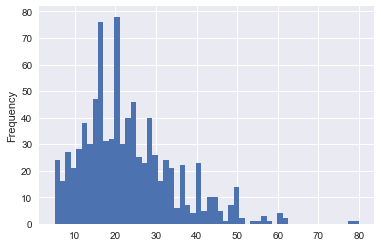

In [14]:
# frequencia do percentual (%) de desconto no dataset
kabum.desconto.plot.hist(56)

In [15]:
kabum.groupby(['dep_nome']).describe()

vlr_diferenca                                    \
                           count        mean         std       min   
dep_nome                                                             
Automação                    1.0   46.158000         NaN   46.1580   
Celular & Telefone          63.0  291.567057  259.493076   12.9215   
Computadores                67.0  483.492560  628.809193   40.5670   
Câmeras Digitais             3.0  344.701667  550.306406   19.9165   
Eletroportáteis              4.0   89.893750   38.904683   54.0995   
Eletrônicos                  4.0  110.089375   92.257613   37.6285   
Gamer                      159.0  303.243044  175.769640   12.3920   
Hardware                   222.0  193.734551  192.115218    6.5120   
Periféricos                307.0  123.281091  120.680977    7.3395   
Segurança                   13.0   66.678423   82.837548    4.8125   
Vídeo & Som                 26.0  670.231096  407.673459  146.8375   

                                                                   
                           25%        50%          75%        max  
dep_nome                                                           
Automação            46.158000   46.15800    46.158000    46.1580  
Celular & Telefone   97.873800  204.33400   411.748000  1099.9975  
Computadores        177.170500  329.39400   583.516000  4777.7600  
Câmeras Digitais     27.008500   34.10050   507.094250   980.0880  
Eletroportáteis      73.598375   80.09800    96.393375   145.2795  
Eletrônicos          57.524875   79.36250   131.927000   244.0040  
Gamer               199.999000  299.99850   350.001000   700.0030  
Hardware             65.856250  129.69000   251.501625  1082.3400  
Periféricos          39.386500   83.22000   167.041750   644.4280  
Segurança            33.690500   37.04300    51.164000   302.8110  
Vídeo & Som         385.274875  491.98925  1040.561000  1558.8120

In [16]:
# quantidade de produtos por departamento
kabum['quantidade'].groupby(kabum['dep_nome']).count() + kabum['oferta_quantidade_vendida'].groupby(kabum['dep_nome']).count() 

dep_nome
Automação               2
Celular & Telefone    126
Computadores          134
Câmeras Digitais        6
Eletroportáteis         8
Eletrônicos             8
Gamer                 318
Hardware              444
Periféricos           614
Segurança              26
Vídeo & Som            52
dtype: int64

In [17]:
# quantidade de itens por departamento
kabum['quantidade'].groupby(kabum['dep_nome']).sum() + kabum['oferta_quantidade_vendida'].groupby(kabum['dep_nome']).sum()

dep_nome
Automação                150
Celular & Telefone     24482
Computadores           28459
Câmeras Digitais        1870
Eletroportáteis          600
Eletrônicos              280
Gamer                  15540
Hardware              184722
Periféricos           151230
Segurança                830
Vídeo & Som             2522
dtype: int64

In [18]:
kabum['desconto'].groupby(kabum['dep_nome']).describe()

,count,unique,top,freq
dep_nome,,,,
Automação,1,1,27,1
Celular & Telefone,63,24,6,12
Computadores,67,27,16,7
Câmeras Digitais,3,3,26,1
Eletroportáteis,4,2,23,2
Eletrônicos,4,4,7,1
Gamer,159,31,21,20
Hardware,222,34,15,20
Periféricos,307,48,30,18
